# 2장. 시작하기전에: 신경망의 수학적 구성 요소

코드는 GoogleColab 환경에서 작성하였습니다.


## 2.1 신경망 예제

입력 데이터를 훈련 셋과 테스트 셋으로 나눔

In [8]:
# 케라스에서 MNIST 데이터셋 적재하기
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [9]:
train_labels, np.unique(train_labels)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [10]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

In [11]:
test_labels, np.unique(test_labels)

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

층을 이용하여 데이터를 처리 및 유용한 표현 추출

In [15]:
# 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

신경망이 훈련할 수 있도록 설정 값을 지정

**손실 함수(loss function)** : 신경망의 성능 측정 방법, 네트워크의 방향성을 지시  
**옵티마이저(optimizer)** : 데이터와 손실 함수 기반으로 네트워크 업데이트  
**판단 지표(metric)** : 학습이 잘 되고 있는 지에 대한 지표


In [17]:
# 컴파일 단계
network.compile(optimizer = "rmsprop",
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

데이터 정규화

In [19]:
# 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

라벨 범주화

In [20]:
# 레이블 준비하기
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

모델 학습

In [21]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2532 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1049 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0697 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0377 - accuracy: 0.9889


In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9791


In [23]:
print("test_acc : ", test_acc)

test_acc :  0.9790999889373779


## 2.2 신경망을 위한 데이터 표현

### 텐서(tensor)

**데이터를 위한 컨테이너**  
- 임의의 차원 개수를 가지는 행렬의 일반화 된 모습
 > 텐서에서 차원이란, 축(axis)  
 
#### 스칼라(0D 텐서)

**하나의 숫자만 담고 있는 텐서**  
- 배열의 축 개수 0
 > 랭크(Rank), 축 개수

In [27]:
import numpy as np
x = np.array(12)
print('x :', x, '\nx.ndim :', x.ndim)

x : 12 
x.ndim : 0


#### 벡터(1D 텐서)

**숫자의 배열**  
- 배열의 축 개수 1

In [28]:
import numpy as np
x = np.array([12, 3, 6, 14, 7])
print('x :', x, '\nx.ndim :', x.ndim)

x : [12  3  6 14  7] 
x.ndim : 1


#### 행렬(2D 텐서)

**벡터의 배열**  
- 배열이 축 개수 2
- 행과 열

**벡터 데이터**
- **(samples, features)**





In [32]:
import numpy as np
x = np.array([[12, 3, 6, 14, 7],
              [13, 4, 7, 15, 8],
              [14, 5, 8, 17, 9]])
print('x.ndim :', x.ndim)

x.ndim : 2


#### 3D 텐서와 고차원 텐서

**행렬들의 배열**  
- 배열이 축 개수 3개 이상

**3D 텐서**
- 시계열 데이터 또는 시퀀스 데이터
- **(samples, timesteps, features)**

**4D 텐서**
- 이미지
- **(samples, height, width, channels)** 또는 **(samples, channels, height, width)** 

**5D 텐서**
- 동영상
- **(samples, frames, height, width, channels)** 또는 **(samples, frames, channels, height, width)**



In [33]:
import numpy as np
x = np.array([[[12, 3, 6, 14, 7],
              [13, 4, 7, 15, 8],
              [14, 5, 8, 17, 9]],
              [[15, 6, 9, 16, 0],
              [16, 7, 0, 17, 1],
              [17, 8, 1, 18, 2]]])
print('x.ndim :', x.ndim)

x.ndim : 3


#### 텐서의 특징
- 축의 개수(랭크) : `ndim`
- 크기 : `shape`
- 데이터 타입 : `dtype`


(28, 28)


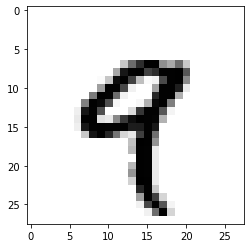

In [57]:
# 이미지 출력하기
import matplotlib.pyplot as plt

digit = train_images[4].reshape((28, 28))
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

### 넘파이로 텐서 조작하기


In [67]:
train_images = train_images.reshape((len(train_images), 28, 28))
train_images.shape

(60000, 28, 28)

In [61]:
my_slice = train_images[10:100]

my_slice.shape

(90, 28, 28)

In [69]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [70]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [71]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### 배치 데이터

**한 번에 데이터를 학습 할 양**


## 텐서 연산
### 원소별 연산


In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]    
    return x

위의 식을 numpy를 이용하여 쉽게 구현할 수 있다.

In [ ]:
import numpy as np

z = x + y
z = np.maximum(z, 0.)

### 브로드 캐스팅

**작은 텐서가 큰 텐서의 크기에 맞추어 연산**




In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [74]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### 텐서 점곱

**행렬 곱, 앞의 행렬 행 * 뒤 행렬 열 곱**




In [ ]:
import numpy as np

z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]

    z = np.zerose((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            row_x = x[i, :]
            column_y = y[:, ]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 텐서 크기 변환
- 특정 크기에 맞게 열과 행을 재배열


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

### 텐서 연산의 기하학적 해석
- 텐서는 좌표 포인트로 해석 가능

### 딥러닝의 기하학적 해석
- 복잡하고 심하게 꼬여 있는 데이터의 매니폴드에 대한 깔끔한 표현을 찾는 일

## 신경망의 엔진: 그래디언트 기반 최적화
훈련 루프
1. 훈련 샘플 x와 이에 상응하는 y 값 배치 추출
2. x를 사용하여 네트워크 실행 및 y 값 예측
3. 실제 값과 예측 값의 차이 계산하여 배치에 대한 네트워크의 손실 계산
4. 배치에 대한 손실이 감소 되도록 네트워크 가중치 업데이트

활용 기술
- 미분 가능
- 그래디언트

### 변화율이란?

**x가 변화 할 때 y가 얼마나 변화하는지에 대한 비율**
- 기울기

### 텐서 연산의 변화율: 그래디언트

**텐서 연산의 변화율**

### 확률적 경사 하강법

**확률적으로 변화율이 0이 되는 지점을 찾는 것**
> 확률적이란, 무작위하다는 과학적 표현

### 변화율 연결: 역전파 알고리즘

연쇄 법칙을 활용하여 각 층의 값들을 경사 하강법으로 연산
- $f(g(x))' = f'(g(x)) * g'(x)$